## Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("LoanExport.csv")

C:\Users\ladli\AppData\Local\Temp\ipykernel_26596\1756212267.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("LoanExport.csv")


In [3]:
# Display the column names

print("\nColumn Names:")
df.columns


Column Names:


Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [4]:
# Display the first 15 rows of the dataset

df.head(15)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
5,0,199902,N,202901,X,25,1,O,89,40,...,80400,F199Q1224802,N,360,2,Ot,Other servicers,0,0,42
6,0,199902,N,202901,X,25,1,O,90,21,...,53100,F199Q1291436,P,360,1,RE,Other servicers,0,0,44
7,0,199902,X,202901,36740,0,1,O,72,20,...,32800,F199Q1001824,N,360,1,NO,WELLSFARGOBANKNA,1,3,145
8,0,199902,Y,202710,25540,30,1,O,95,38,...,6400,F199Q1079744,P,345,1,Ot,Other servicers,0,0,64
9,0,199902,Y,202901,48620,30,1,O,95,27,...,67000,F199Q1196318,P,360,1,Ot,WELLSFARGOBANKNA,1,104,212


In [5]:
# Get information about each variable

print("\nVariable Information:")
df.info()


Variable Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType

In [6]:
missing_values = df.isnull().sum()
missing_values

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

In [7]:
df['SellerName'].fillna(df['SellerName'].mode()[0], inplace=True)

In [8]:
cat_columns = df.select_dtypes(include=['object'])

# Iterate over categorical columns
for col in cat_columns:
    # Count the number of unique categories in the column
    num_categories = df[col].nunique()
    print(f"{col} has {num_categories} categories")

FirstTimeHomebuyer has 3 categories
MSA has 392 categories
Occupancy has 3 categories
Channel has 4 categories
PPM has 3 categories
ProductType has 1 categories
PropertyState has 53 categories
PropertyType has 7 categories
PostalCode has 1767 categories
LoanSeqNum has 291451 categories
LoanPurpose has 3 categories
NumBorrowers has 3 categories
SellerName has 20 categories
ServicerName has 20 categories


## Data Cleaning

In [9]:
class DataCleaning:
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        X_cleaned = X.copy()
        
        # Replace specific values with np.nan
        columns_to_replace = ['FirstTimeHomebuyer', 'MSA', 'PPM', 'PropertyType', 'NumBorrowers']
        for col in columns_to_replace:
            X_cleaned[col] = X_cleaned[col].replace('X', np.nan)
        
        # Remove leading/trailing whitespace in 'MSA' column
        X_cleaned['MSA'] = X_cleaned['MSA'].str.strip()
        
        # Return the cleaned DataFrame
        return X_cleaned


In [10]:
unique_combinations = df.drop_duplicates(subset=['SellerName', 'MSA', 'PPM', 'PropertyType', 'NumBorrowers'])

print(unique_combinations.head(2))

   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   

  OrigLoanTerm NumBorrowers SellerName          ServicerName EverDelinquent  \
0          360            2         FL  WASHINGTONMUTUALBANK              0   
1          360            1         FT  CHASEHOMEFINANCELLC               0   

  MonthsDelinquent MonthsInRepayment  
0                0                52  
1                0               144  

[2 rows x 28 columns]


In [11]:
class MissingValueHandler:
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Handle missing values as you did before
        
        # Clean 'NumBorrowers' column
        X['NumBorrowers'] = X['NumBorrowers'].apply(self.clean_num_borrowers)
        
        return X
    
    def clean_num_borrowers(self, value):
        try:
            return int(value)
        except (ValueError, TypeError):
            return None

# Create an instance of MissingValueHandler
missing_value_handler = MissingValueHandler()

# Apply the transformation
transformed_df = missing_value_handler.transform(df.copy())  # Make a copy to avoid modifying the original data

print(transformed_df.head())

   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorrowers SellerName      

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [13]:
class FeatureDropper:
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X.drop(['MSA', 'PostalCode', 'PropertyState', 'ServicerName', 'SellerName', 'LoanSeqNum'], axis=1, inplace=True)
        return X


# Create an instance of FeatureDropper
feature_dropper = FeatureDropper()

# Fit and transform
transformed_df = feature_dropper.transform(df.copy())  # Make a copy to avoid modifying the original data

print(transformed_df.head())


   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate  MIP  Units  \
0            0            199902                  N        202901   25      1   
1            0            199902                  N        202901    0      1   
2            0            199902                  N        202901    0      1   
3            0            199902                  N        202901    0      1   
4            0            199902                  N        202901    0      1   

  Occupancy  OCLTV  DTI  OrigUPB  ...  Channel  PPM ProductType PropertyType  \
0         O     89   27   117000  ...        T    N       FRM             SF   
1         O     73   17   109000  ...        R    N       FRM             SF   
2         O     75   16    88000  ...        T    N       FRM             SF   
3         O     76   14   160000  ...        R    N       FRM             SF   
4         O     78   18   109000  ...        R    N       FRM             SF   

  LoanPurpose OrigLoanTerm NumBo

In [14]:
class Handling_Outliers:
    
    def handle_outlier(self, col, z_score_threshold):
        median = col.median()
        mad = (col - median).abs().median()
        modified_z_score = z_score_threshold
        lower = median - (modified_z_score * mad)
        upper = median + (modified_z_score * mad)
        return lower, upper

    def fit(self, X, y=None):
        return self

    def transform(self, X, z_score_threshold=2.0):
        for col_name in ['Units', 'OrigInterestRate', 'OrigUPB']:
            lower, upper = self.handle_outlier(X[col_name], z_score_threshold)
            X[col_name] = X[col_name].apply(lambda x: lower if x < lower else (upper if x > upper else x))
        
        return X

# Create an instance of Handling_Outliers
outliers_handler = Handling_Outliers()

# Apply the transformation with a z-score threshold of 3.0
transformed_df = outliers_handler.transform(df.copy(), z_score_threshold=3.0)

print(transformed_df.head(2))


   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0    1.0         O     89   27  ...       60400  F199Q1268030            P   
1    1.0         O     73   17  ...       80200  F199Q1015092            N   

  OrigLoanTerm NumBorrowers SellerName          ServicerName EverDelinquent  \
0          360            2         FL  WASHINGTONMUTUALBANK              0   
1          360            1         FT  CHASEHOMEFINANCELLC               0   

  MonthsDelinquent MonthsInRepayment  
0                0                52  
1                0               144  

[2 rows x 28 columns]


In [15]:
# Data Cleaning

data_cleaner = DataCleaning()
df_cleaned = data_cleaner.transform(df.copy())  

# Handling Outliers

outliers_handler = Handling_Outliers()
df_handled_outliers = outliers_handler.transform(df_cleaned.copy()) 

# Handling Missing Values

missing_value_handler = MissingValueHandler()
df_handled_missing = missing_value_handler.transform(df_handled_outliers.copy())

# Droping Unused Features

feature_dropper = FeatureDropper()
final_transformed_df = feature_dropper.transform(df_handled_missing.copy()) 
print(final_transformed_df.head(2))



   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate  MIP  Units  \
0            0            199902                  N        202901   25    1.0   
1            0            199902                  N        202901    0    1.0   

  Occupancy  OCLTV  DTI   OrigUPB  ...  Channel  PPM ProductType PropertyType  \
0         O     89   27  117000.0  ...        T    N       FRM             SF   
1         O     73   17  109000.0  ...        R    N       FRM             SF   

  LoanPurpose OrigLoanTerm NumBorrowers  EverDelinquent  MonthsDelinquent  \
0           P          360          2.0               0                 0   
1           N          360          1.0               0                 0   

   MonthsInRepayment  
0                 52  
1                144  

[2 rows x 22 columns]


In [16]:
New_Df2 = df.copy()

### Converting CreditScore into credit_score_ranges

**The ranges are in Descending order**

800 to 850: Excellent Individuals in this range are considered to be low-risk borrowers. They may have an easier time securing a loan than borrowers with lower scores.

740 to 799: Very good Individuals in this range have demonstrated a history of positive credit behavior and may have an easier time being approved for additional credit.

670 to 739: Good Lenders generally view those with credit scores of 670 and up as acceptable or lower-risk borrowers.

580 to 669: Fair Individuals in this category are often considered “subprime” borrowers. Lenders may consider them higher-risk, and they may have trouble qualifying for new credit.

300 to 579: Poor Individuals in this range often have difficulty being approved for new credit. If you find yourself in the poor category, it's likely you'll need to take steps to improve your credit scores before you can secure any new credit.

In [17]:
# Define the credit score ranges and corresponding labels
credit_score_ranges = [0, 580, 670, 740, 800, 850]
credit_score_labels = ['Poor (0-579)', 'Fair (580-669)', 'Good (670-739)', 'Very Good (740-799)', 'Excellent (800-850)']

# Create the 'CreditScoreRange' column with credit score ranges
New_Df2['CreditScoreRange'] = pd.cut(New_Df2['CreditScore'], bins=credit_score_ranges, labels=credit_score_labels, right=False)

# Calculate the frequency of each credit score range
credit_score_freq = New_Df2['CreditScoreRange'].value_counts()

New_Df2['CreditScoreRange'] = New_Df2['CreditScoreRange'].astype('object')

print(New_Df2)
print(credit_score_freq)


        CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  \
0                 0            199902                  N        202901  16974   
1                 0            199902                  N        202901  19740   
2                 0            199902                  N        202901  29940   
3                 0            199902                  N        202901  31084   
4                 0            199902                  N        202901  35644   
...             ...               ...                ...           ...    ...   
291446          839            199903                  N        202902  37964   
291447          840            200210                  N        202904  35644   
291448          840            200304                  N        202904  42044   
291449          845            199904                  N        202903  37964   
291450          849            199903                  N        202902  37964   

        MIP  Units Occupanc

In [18]:
New_Df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

### Converting LTV into LTV_Category

In [19]:
# Define the bins and labels for the categories
bins = [0, 25, 50, 1000]
labels = ['Low', 'Medium', 'High']

# Create a new column 'LTV_Category' with the transformed categories
New_Df2['LTV_Category'] = pd.cut(New_Df2['LTV'], bins=bins, labels=labels)


# Convert the 'LTV_Category' column data type to 'object'
New_Df2['LTV_Category'] = New_Df2['LTV_Category'].astype('object')

# Display the DataFrame with the new 'LTV_Category'
print(New_Df2[['LTV', 'LTV_Category']])


        LTV LTV_Category
0        89         High
1        73         High
2        75         High
3        76         High
4        78         High
...     ...          ...
291446   60         High
291447   73         High
291448   73         High
291449   80         High
291450   47       Medium

[291451 rows x 2 columns]


In [20]:
# Fill missing values in 'LTV_Category' column with a specified value ('None' in this case)
New_Df2['LTV_Category'].fillna('None', inplace=True)


###  Calculating the number of months between 'FirstPaymentDate' and 'MaturityDate'

In [21]:
# Convert 'FirstPaymentDate' and 'MaturityDate' to strings
New_Df2['FirstPaymentDate'] = New_Df2['FirstPaymentDate'].astype(str)
New_Df2['MaturityDate'] = New_Df2['MaturityDate'].astype(str)

# Calculate the number of months between 'FirstPaymentDate' and 'MaturityDate'
New_Df2['NumMonths'] = ((pd.to_datetime(df['MaturityDate'], format='%Y%m') - pd.to_datetime(df['FirstPaymentDate'], format='%Y%m')) / pd.Timedelta(days=30.44)).astype(int)

print(New_Df2.head())



   CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate    MSA  MIP  \
0            0           199902                  N       202901  16974   25   
1            0           199902                  N       202901  19740    0   
2            0           199902                  N       202901  29940    0   
3            0           199902                  N       202901  31084    0   
4            0           199902                  N       202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  OrigLoanTerm  NumBorrowers  SellerName  \
0      1         O     89   27  ...           360             2          FL   
1      1         O     73   17  ...           360             1          FT   
2      1         O     75   16  ...           360             2          FL   
3      1         O     76   14  ...           360             2          GM   
4      1         O     78   18  ...           360             2          GM   

           ServicerName EverDelinquent MonthsDelin

### Creating a RepayRange column
With the help of 'YearsInRepayment' by dividing 'MonthsInRepayment' by 12

In [22]:
# Create a new column 'YearsInRepayment' by dividing 'MonthsInRepayment' by 12
New_Df2['YearsInRepayment'] = New_Df2['MonthsInRepayment'] / 12

# Define the ranges for years
bins = [0, 5, 10, 15, 20, 25]
# Create labels for each range
labels = ['0-4 years', '4-8 years', '8-12 years', '12-16 years', '16-20 years']

# Cut the 'YearsInRepayment' into the defined ranges and assign the labels
New_Df2['RepayRange'] = pd.cut(New_Df2['YearsInRepayment'], bins=bins, labels=labels)

# Convert the 'YearsRange' column to the 'object' data type
New_Df2['RepayRange'] = New_Df2['RepayRange'].astype('object')

# Drop the 'YearsInRepayment' column if not needed anymore
New_Df2.drop(columns=['YearsInRepayment'], inplace=True)

# Display the transformed DataFrame
print(New_Df2.head())


   CreditScore FirstPaymentDate FirstTimeHomebuyer MaturityDate    MSA  MIP  \
0            0           199902                  N       202901  16974   25   
1            0           199902                  N       202901  19740    0   
2            0           199902                  N       202901  29940    0   
3            0           199902                  N       202901  31084    0   
4            0           199902                  N       202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  NumBorrowers  SellerName  \
0      1         O     89   27  ...             2          FL   
1      1         O     73   17  ...             1          FT   
2      1         O     75   16  ...             2          FL   
3      1         O     76   14  ...             2          GM   
4      1         O     78   18  ...             2          GM   

           ServicerName EverDelinquent MonthsDelinquent MonthsInRepayment  \
0  WASHINGTONMUTUALBANK              0                0  

In [23]:
New_Df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  object 
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  object 
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [24]:
New_Df2.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment',
       'CreditScoreRange', 'LTV_Category', 'NumMonths', 'RepayRange'],
      dtype='object')

In [25]:
Df3 = New_Df2.copy

In [26]:
# List of columns to drop
columns_to_drop = ['SellerName', 'FirstPaymentDate', 'MaturityDate', 'ServicerName', 'MSA', 'PropertyState', 'PostalCode','LoanSeqNum','ProductType']

# Drop the specified columns from the dataset
New_Df2 = New_Df2.drop(columns=columns_to_drop)

# Display the modified dataset
print(New_Df2.head())


   CreditScore FirstTimeHomebuyer  MIP  Units Occupancy  OCLTV  DTI  OrigUPB  \
0            0                  N   25      1         O     89   27   117000   
1            0                  N    0      1         O     73   17   109000   
2            0                  N    0      1         O     75   16    88000   
3            0                  N    0      1         O     76   14   160000   
4            0                  N    0      1         O     78   18   109000   

   LTV  OrigInterestRate  ... LoanPurpose OrigLoanTerm NumBorrowers  \
0   89             6.750  ...           P          360            2   
1   73             6.500  ...           N          360            1   
2   75             6.875  ...           N          360            2   
3   76             6.875  ...           N          360            2   
4   78             7.125  ...           N          360            2   

  EverDelinquent  MonthsDelinquent MonthsInRepayment  CreditScoreRange  \
0              0  

In [27]:
New_Df2_encoded = New_Df2.copy()

# Convert 'FirstTimeHomebuyer' column to 'Yes' and 'No'
New_Df2_encoded['FirstTimeHomebuyer'] = New_Df2_encoded['FirstTimeHomebuyer'].replace({'N': 'No', 'Y': 'Yes'})

# List of categorical columns to label encode
categorical_columns = ['CreditScoreRange', 'LTV_Category', 'RepayRange', 'Occupancy', 'LoanPurpose', 'FirstTimeHomebuyer','PPM','PropertyType','NumBorrowers','Channel']

# Apply label encoding to categorical columns
for col in categorical_columns:
    label_encoder = LabelEncoder()
    New_Df2_encoded[col] = label_encoder.fit_transform(New_Df2_encoded[col])

# Display the encoded dataset
print(New_Df2_encoded.head(2))



   CreditScore  FirstTimeHomebuyer  MIP  Units  Occupancy  OCLTV  DTI  \
0            0                   0   25      1          1     89   27   
1            0                   0    0      1          1     73   17   

   OrigUPB  LTV  OrigInterestRate  ...  LoanPurpose  OrigLoanTerm  \
0   117000   89              6.75  ...            2           360   
1   109000   73              6.50  ...            1           360   

   NumBorrowers  EverDelinquent  MonthsDelinquent  MonthsInRepayment  \
0             1               0                 0                 52   
1             0               0                 0                144   

   CreditScoreRange  LTV_Category  NumMonths  RepayRange  
0                 3             0        358           0  
1                 3             0        358           3  

[2 rows x 23 columns]


In [28]:
cat_columns = New_Df2_encoded.select_dtypes(include=['object'])

# Iterate over categorical columns
for col in cat_columns:
    # Count the number of unique categories in the column
    num_categories = New_Df2_encoded[col].nunique()
    print(f"{col} has {num_categories} categories")

In [29]:
New_Df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstTimeHomebuyer  291451 non-null  int32  
 2   MIP                 291451 non-null  int64  
 3   Units               291451 non-null  int64  
 4   Occupancy           291451 non-null  int32  
 5   OCLTV               291451 non-null  int64  
 6   DTI                 291451 non-null  int64  
 7   OrigUPB             291451 non-null  int64  
 8   LTV                 291451 non-null  int64  
 9   OrigInterestRate    291451 non-null  float64
 10  Channel             291451 non-null  int32  
 11  PPM                 291451 non-null  int32  
 12  PropertyType        291451 non-null  int32  
 13  LoanPurpose         291451 non-null  int32  
 14  OrigLoanTerm        291451 non-null  int64  
 15  NumBorrowers        291451 non-nul

In [30]:
Df4 = New_Df2_encoded.copy()

### FEATURE ENGINEERING

In [31]:
X = New_Df2_encoded.drop(['EverDelinquent'], axis=1 , inplace=False)
y = New_Df2_encoded['EverDelinquent']

In [32]:
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
loansScores = pd.DataFrame(fit.scores_)
loansCol = pd.DataFrame(X.columns)
featureScore = pd.concat([loansCol, loansScores], axis = 1)
featureScore.columns = ['features', 'score']
featureScore

,features,score
0,CreditScore,8.259904e+04
1,FirstTimeHomebuyer,2.346114e+01
2,MIP,1.820773e+04
3,Units,1.208859e+00
4,Occupancy,2.329238e+00
5,OCLTV,3.774875e+03
6,DTI,6.526476e+03
7,OrigUPB,3.069602e+07
8,LTV,3.794497e+03
9,OrigInterestRate,1.812752e+01


### F-test

In [33]:
f_test_selector = SelectKBest(score_func=f_classif, k=10)
X_f_test_selected = f_test_selector.fit_transform(X, y)
print("Selected features using F-test:")
print(X.columns[f_test_selector.get_support()])

Selected features using F-test:
Index(['CreditScore', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'NumBorrowers',
       'MonthsDelinquent', 'MonthsInRepayment', 'CreditScoreRange',
       'RepayRange'],
      dtype='object')


### Random_Forest_Classifier

In [34]:
# Tree-based feature importance
rf_classifier = RandomForestClassifier()  # You can adjust hyperparameters
rf_classifier.fit(X, y)
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
selected_features_rf = feature_importances.nlargest(10).index
X_rf_selected = X[selected_features_rf]

print("Selected features using Random Forest:")
print(selected_features_rf)

Selected features using Random Forest:
Index(['MonthsDelinquent', 'CreditScore', 'MonthsInRepayment', 'RepayRange',
       'CreditScoreRange', 'OrigUPB', 'DTI', 'OrigInterestRate', 'LTV',
       'OCLTV'],
      dtype='object')


### L1 regularization (Lasso)

In [35]:
from sklearn.linear_model import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X, y)
selected_features_lasso = X.columns[lasso.coef_[0] != 0]
X_lasso_selected = X[selected_features_lasso]

print("\nSelected features using Lasso:")
print(selected_features_lasso)


Selected features using Lasso:
Index(['CreditScore', 'FirstTimeHomebuyer', 'MIP', 'Units', 'Occupancy',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'Channel', 'PPM',
       'PropertyType', 'LoanPurpose', 'OrigLoanTerm', 'NumBorrowers',
       'MonthsDelinquent', 'MonthsInRepayment', 'CreditScoreRange',
       'LTV_Category', 'NumMonths', 'RepayRange'],
      dtype='object')


C:\Users\ladli\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Chi-squared feature selection

              Feature         Score
7             OrigUPB  3.069602e+07
16   MonthsDelinquent  2.171561e+06
17  MonthsInRepayment  5.516465e+05
0         CreditScore  8.259904e+04
2                 MIP  1.820773e+04
21         RepayRange  1.629608e+04
18   CreditScoreRange  7.227536e+03
6                 DTI  6.526476e+03
8                 LTV  3.794497e+03
5               OCLTV  3.774875e+03


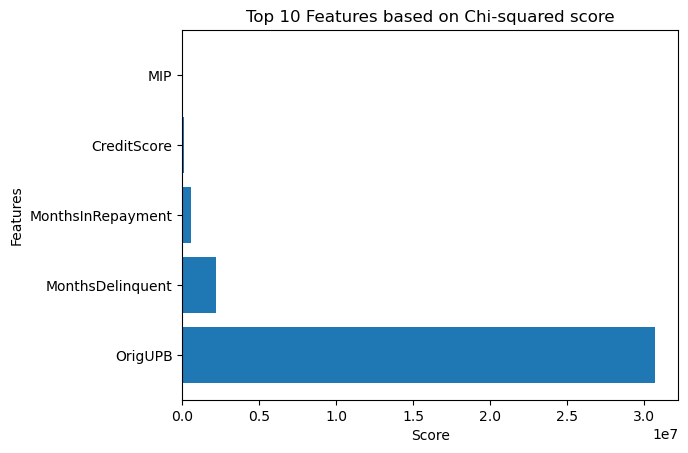

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import matplotlib.pyplot as plt

X = New_Df2_encoded.drop('EverDelinquent', axis=1)
y = New_Df2_encoded['EverDelinquent']

# Apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

# Create DataFrame for feature scores and names
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})

# Print the 10 best features
print(feature_scores.nlargest(10, 'Score'))

# Plot the top 5 features
top_10_features = feature_scores.nlargest(5, 'Score')
plt.barh(top_10_features['Feature'], top_10_features['Score'])
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Top 10 Features based on Chi-squared score')
plt.show()


### MI SCORE

In [37]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)
print(mi_score)

[0.03579659 0.00578962 0.00547914 0.04983593 0.05605884 0.00613118
 0.00304645 0.00500429 0.00689846 0.0090021  0.02154491 0.00054948
 0.05068465 0.02045457 0.05296587 0.04479638 0.49747153 0.03114927
 0.04651537 0.00307922 0.03186904 0.02987544]


The *mutual_info_classif* function is a list of mutual information scores calculated for each feature with respect to the target variable.

Features with higher scores, such as index 16 (MonthsDelinquent) and index 17 (MonthsInRepayment), have a relatively strong relationship with the target variable.

Features with lower scores, such as index 6 (DTI) and index 11 (PPM), have weaker relationships with the target.

Dataset_1

In [38]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,  # You can adjust the test size as needed
    random_state=0,
    stratify=y
)

Dataset_2 with mi_score > 0.25

In [39]:
mi_score_selected_index = np.where(mi_score > 0.25)[0]
X_2 = X.iloc[:, mi_score_selected_index]

X_train_2, X_test_2, y_train, y_test = train_test_split(
    X_2, y,
    test_size=0.25,  # You can adjust the test size as needed
    random_state=0,
    stratify=y
)



Dataset_3 with mi_score < 0.25

In [40]:
mi_score_selected_index = np.where(mi_score < 0.25)[0]
X_3 = X.iloc[:, mi_score_selected_index]

X_train_3, X_test_3, y_train, y_test = train_test_split(
    X_3, y,
    test_size=0.25,  # You can adjust the test size as needed
    random_state=0,
    stratify=y
)


Comparing all three model and check the accuracy

In [41]:
# Fit Decision Tree models
model_1 = DecisionTreeClassifier(random_state=0).fit(X_train_1, y_train)
model_2 = DecisionTreeClassifier(random_state=0).fit(X_train_2, y_train)
model_3 = DecisionTreeClassifier(random_state=0).fit(X_train_3, y_train)

# Calculate accuracy scores
score_1 = accuracy_score(y_test, model_1.predict(X_test_1))
score_2 = accuracy_score(y_test, model_2.predict(X_test_2))
score_3 = accuracy_score(y_test, model_3.predict(X_test_3))

# Print scores
print(f"score_1: {score_1}\nscore_2: {score_2}\nscore_3: {score_3}")


score_1: 1.0
score_2: 1.0
score_3: 0.7184853766657975


Three different datasets are created based on the feature importance scores obtained from the mutual information calculation. 

Further, datasets are used to train three separate Decision Tree models.

The output shows that models trained on the different subsets of features achieve accuracy scores of 1.0 (perfect accuracy) for the first two models, and a score of approximately 0.72 for the third model.

### PCA

In [42]:
features = featureScore['features']
scores = featureScore['score']

# Sort the features by their scores in descending order
sorted_features = features[np.argsort(scores)[::-1]]

# Select the top features for PCA (adjust the number as needed)
selected_features = sorted_features[:10]

# Standardize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_features])

# Perform PCA with the number of components you desire
n_components = 5 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame to store the PCA results
pca_results = pd.DataFrame(data=X_pca, columns=[f'PCA_{i+1}' for i in range(n_components)])

# Display the PCA results
print(pca_results.head())


      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5
0 -3.845863  1.708264  5.245634 -2.272140  0.383295
1 -1.039457  4.520247  4.934078 -2.186968  0.958060
2 -1.462187  3.058819  5.398767 -2.774634  0.640831
3 -1.961805  1.135438  6.056649 -2.450484  1.612355
4 -2.009163  1.661658  5.881487 -2.690810  0.826833


Index(['DTI', 'LTV', 'OCLTV', 'OrigInterestRate', 'LTV', 'DTI',
       'FirstTimeHomebuyer', 'CreditScore', 'DTI', 'OCLTV', 'DTI', 'LTV',
       'OrigInterestRate', 'OrigInterestRate', 'MIP', 'Occupancy', 'DTI',
       'MIP', 'OrigInterestRate', 'OCLTV', 'OrigInterestRate', 'MIP'],
      dtype='object')


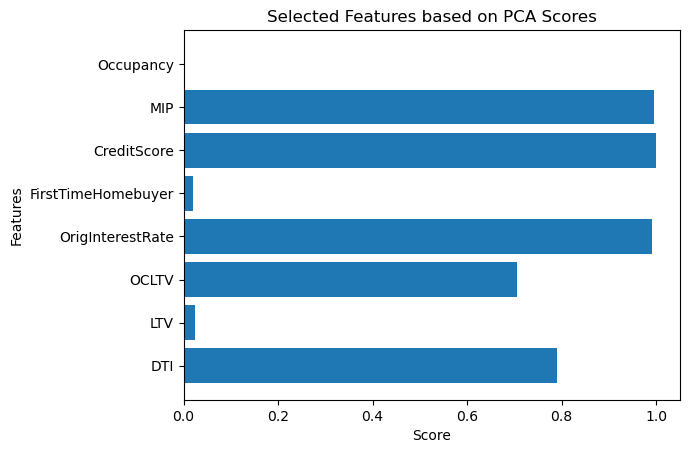

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = New_Df2_encoded.drop('EverDelinquent', axis=1)
y = New_Df2_encoded['EverDelinquent']

# Apply PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Get the selected feature names
selected_features = X.columns[pca.components_.argmax(axis=0)]

# Print the selected features
print(selected_features)

# Graph the scores of the selected features
plt.barh(selected_features, pca.components_.max(axis=0))
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Selected Features based on PCA Scores')
plt.show()


In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(New_Df2_encoded.drop('EverDelinquent', axis=1), New_Df2_encoded['EverDelinquent'], test_size=0.2, random_state=42)

# Define the pipeline for PCA
pca_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('knn', KNeighborsClassifier())
])

# Fit and evaluate the pipelines
pca_pipe.fit(X_train, y_train)

# Make predictions
y_pred = pca_pipe.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy score: {accuracy}")


Accuracy score: 0.8280866686109348


In [45]:
pca_step = pca_pipe.named_steps['pca']

# Get the explained variance ratio
explained_variance_ratio = pca_step.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.15876151 0.09117246 0.08830593 0.07175197 0.06204423 0.05707931
 0.05066859 0.04877723 0.0443485  0.04277947]


The first principal component has the highest variance (0.15876151), and the last principal component
has the least variance (0.04277947).

In [46]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Get the original feature names
original_feature_names = X.columns

# Get the order of feature importance based on explained variance ratio
sorted_variance_indices = pca.explained_variance_ratio_.argsort()[::-1]

# Get the column names of the first and last principal components
first_principal_component_column = original_feature_names[sorted_variance_indices[0]]
last_principal_component_column = original_feature_names[sorted_variance_indices[-1]]

print(f"Column name with highest variance: {first_principal_component_column}")
print(f"Column name with least variance: {last_principal_component_column}")


Column name with highest variance: CreditScore
Column name with least variance: OrigInterestRate


In [47]:
Sel_Feat = ['DTI', 'LTV', 'OCLTV', 'OrigInterestRate','FirstTimeHomebuyer', 'CreditScore', 'MIP', 'Occupancy']
Sel_Dataset = New_Df2_encoded[Sel_Feat]

<Axes: >

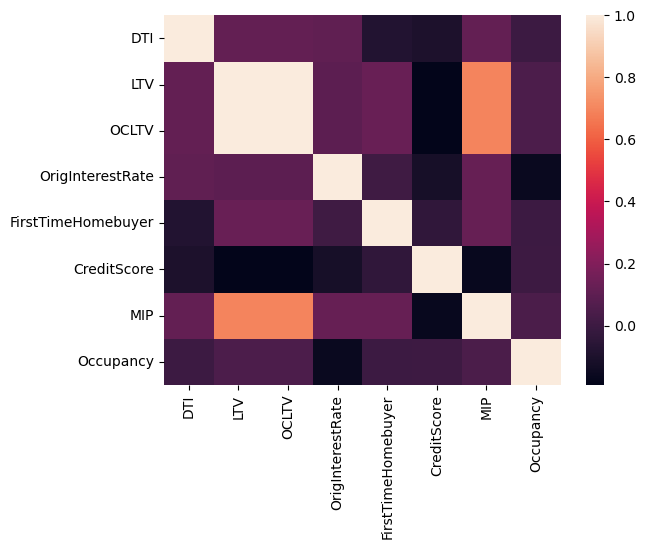

In [48]:
sns.heatmap(Sel_Dataset.corr())